# Test GoData preparation

In [2]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy     as np
import pandas    as pd
from   scipy     import stats
import os
import matplotlib.pyplot as plt

import xyimg.dataprep as dp
import xyimg.detsim   as dsim

In [42]:
pressure = '5bar'
sample   = '1eroi'

path      = os.environ['LPRDATADIR']
ifilename = path + dp.voxel_filename(pressure, sample)
ofile     = 'temp.h5'
print(ifilename)

/scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5


In [43]:
voxels = pd.read_hdf(ifilename, 'voxels')

In [44]:
dxs = dp.get_frame(voxels)
print('frame ', dxs, ', maximum', np.max(dxs))

frame  (276, 281, 304) , maximum 304


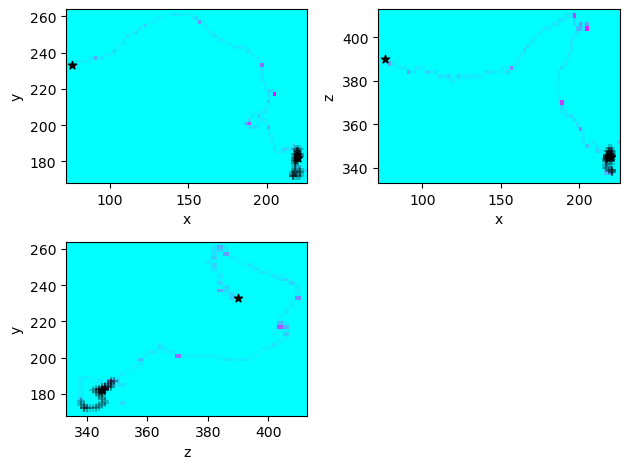

In [45]:
ievt = 11
evt = dsim.df_event(voxels, 1, ievt)
dsim.plot_event(evt, seg = 2, ext = 1)

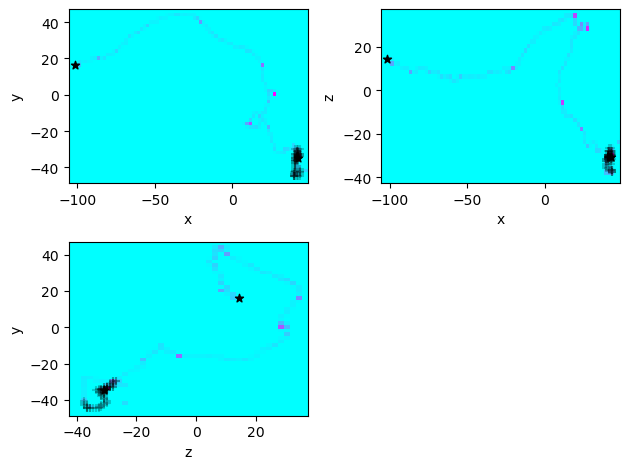

In [46]:
evt = dp.evt_preparation(evt)
dsim.plot_event(evt, seg = 3, ext = 2)

In [49]:
frame = 160
width = (10, 10)
xlabel = ['xy_E_sum', 'xy_E_count',
          'xz_E_sum', 'xz_E_count',
          'zy_E_sum', 'zy_E_count']
zlabel = ['xy_segclass_max', 'xy_ext_max',
          'xz_segclass_max', 'xz_ext_max',
          'zy_segclass_max', 'zy_ext_max']
bins   = [np.arange(-frame, frame, w) for w in width]
gdata = dp.evt_godata(evt, xlabel, zlabel, bins);


y   0
id  (1, 11)


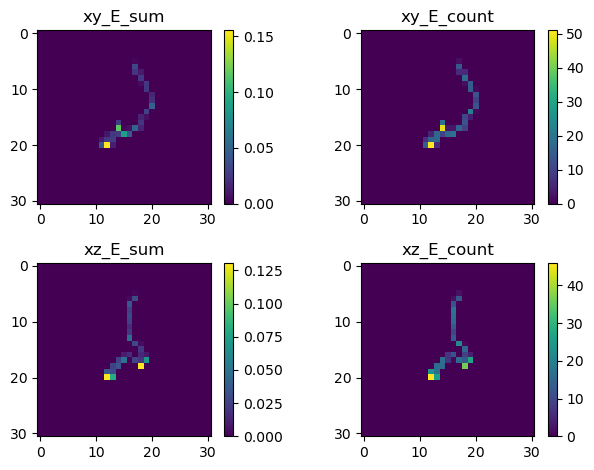

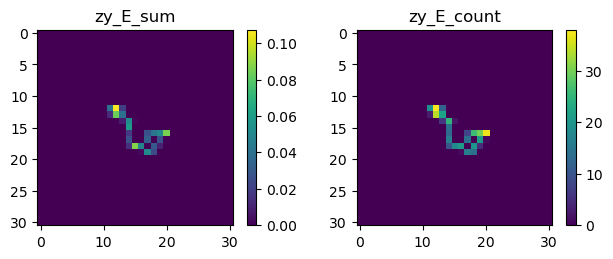

<Figure size 640x480 with 0 Axes>

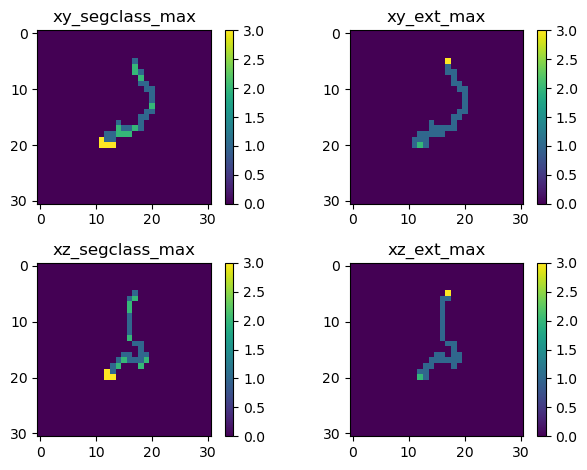

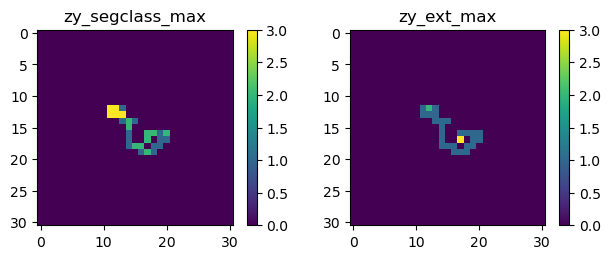

<Figure size 640x480 with 0 Axes>

In [50]:
print('y  ', gdata.y)
print('id ', gdata.id)
dp.plot_imgs(gdata.xdic)
dp.plot_imgs(gdata.zdic)

In [51]:
odata = dp.godata_init(xlabel, zlabel)
for i in range(10):
    evt   = dsim.df_event(voxels, 1, i)
    sevt  = dp.evt_preparation(evt)
    gdata = dp.evt_godata(sevt, xlabel, zlabel, bins)
    dp.godata_append(odata, gdata)

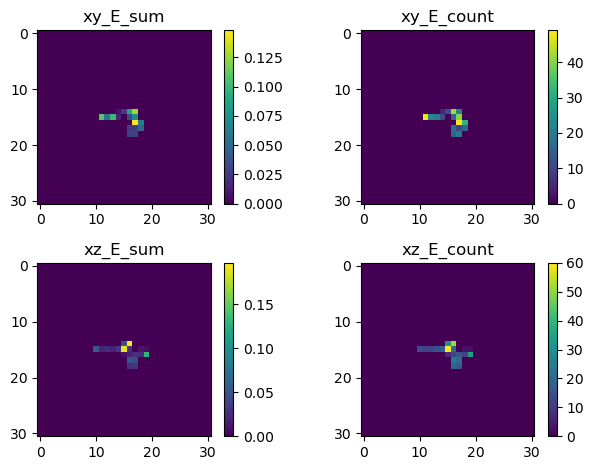

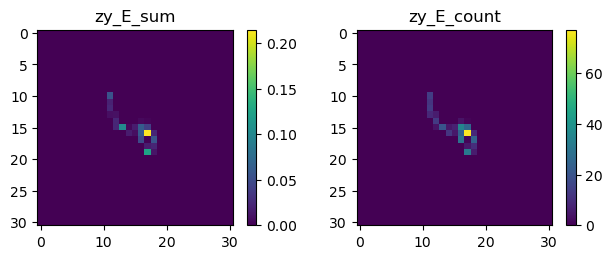

<Figure size 640x480 with 0 Axes>

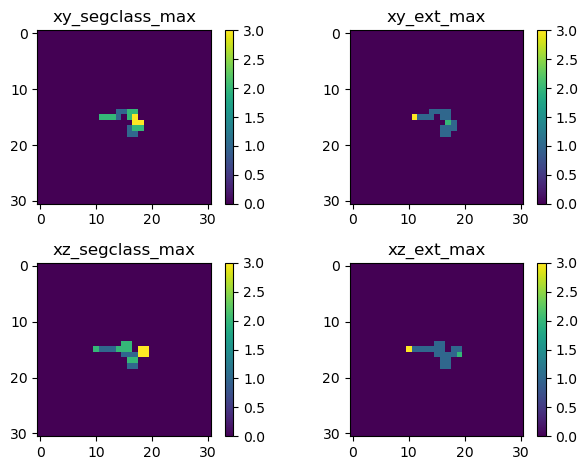

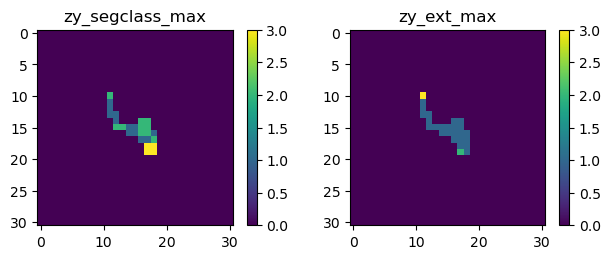

<Figure size 640x480 with 0 Axes>

In [53]:
ievt = 8
dp.plot_imgs(odata.xdic, ievt)
dp.plot_imgs(odata.zdic, ievt)

In [68]:
x = 'aaa'
isinstance(x, str)

True

In [76]:
ofilename   = 'test_godata'
nevents     = 1000
frame       = 160
dp.run_algo(ifilename, ofilename, frame = frame, nevents = nevents)

input  filename  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5
output filename  test_godata
projection       ['xy', 'xz', 'zy']
widths     (mm)  (10, 10)
frame      (mm)  100.0
xlabel           ['E_sum']
zlabel           ['segclass_max', 'ext_max']
events           1000
x labels  ['xy_E_sum', 'xz_E_sum', 'zy_E_sum']
z labels  ['xy_segclass_max', 'xy_ext_max', 'xz_segclass_max', 'xz_ext_max', 'zy_segclass_max', 'zy_ext_max']
opening  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5
processing event  100 , id  (2, 41)
processing event  200 , id  (4, 43)
processing event  300 , id  (6, 34)
processing event  400 , id  (8, 28)
processing event  500 , id  (10, 30)
processing event  600 , id  (12, 16)
processing event  700 , id  (14, 10)
processing event  800 , id  (15, 54)
processing event  900 , id  (18, 1)
processing event  1000 , id  (19, 45)
save godata at  test_godata0
event processed   1001 
time per event    0.02 s
time execution     